## Time Series Analysis

In [26]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

stock_data = yf.download('AAPL', start='2024-01-01')
stock_data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.734985,187.521338,182.993517,186.237618,82488700
2024-01-03,183.351761,184.973819,182.535751,183.321908,58414500
2024-01-04,181.023178,182.197418,179.998201,181.261998,71983600
2024-01-05,180.296707,181.869006,179.291637,181.102771,62303300
2024-01-08,184.655365,184.695178,180.615161,181.202281,59144500
2024-01-09,184.237411,184.247357,181.839157,183.023358,42841800
2024-01-10,185.282303,185.491271,183.023365,183.451277,46792900
2024-01-11,184.685196,186.138085,182.724799,185.630561,49128400


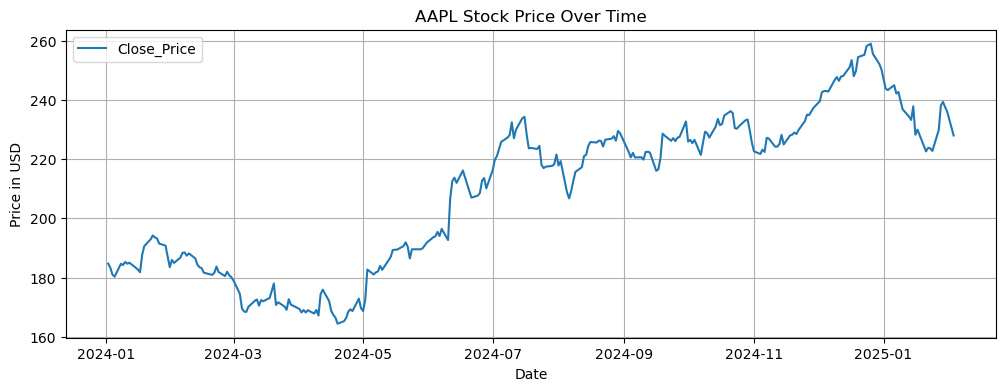

In [4]:
plt.figure(figsize=(12,4))
plt.plot(stock_data.index, stock_data['Close'],label = 'Close_Price')
plt.title("AAPL Stock Price Over Time")
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()

#### Classical decomposition

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_additive = seasonal_decompose(stock_data['Close'], model = 'additive', period = 30)

In [7]:
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

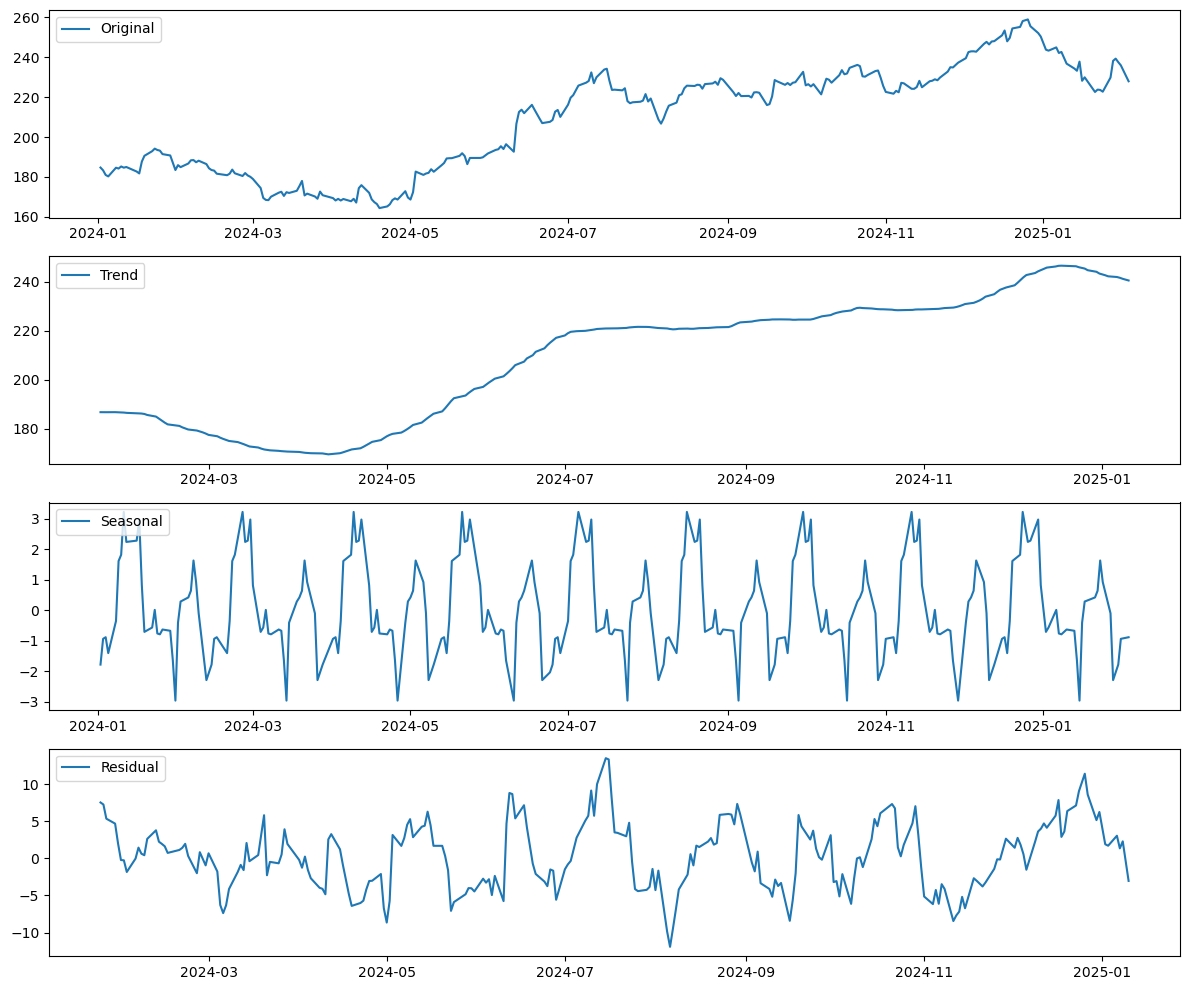

In [8]:
plt.figure(figsize=(12,10))

plt.subplot(411)
plt.plot(stock_data['Close'],label = 'Original')
plt.legend(loc = "upper left")

plt.subplot(412)
plt.plot(trend_additive,label = 'Trend')
plt.legend(loc = "upper left")

plt.subplot(413)
plt.plot(seasonal_additive,label = 'Seasonal')
plt.legend(loc = "upper left")

plt.subplot(414)
plt.plot(residual_additive,label = 'Residual')
plt.legend(loc = "upper left")

plt.tight_layout()
plt.show()

#### STL decomposition

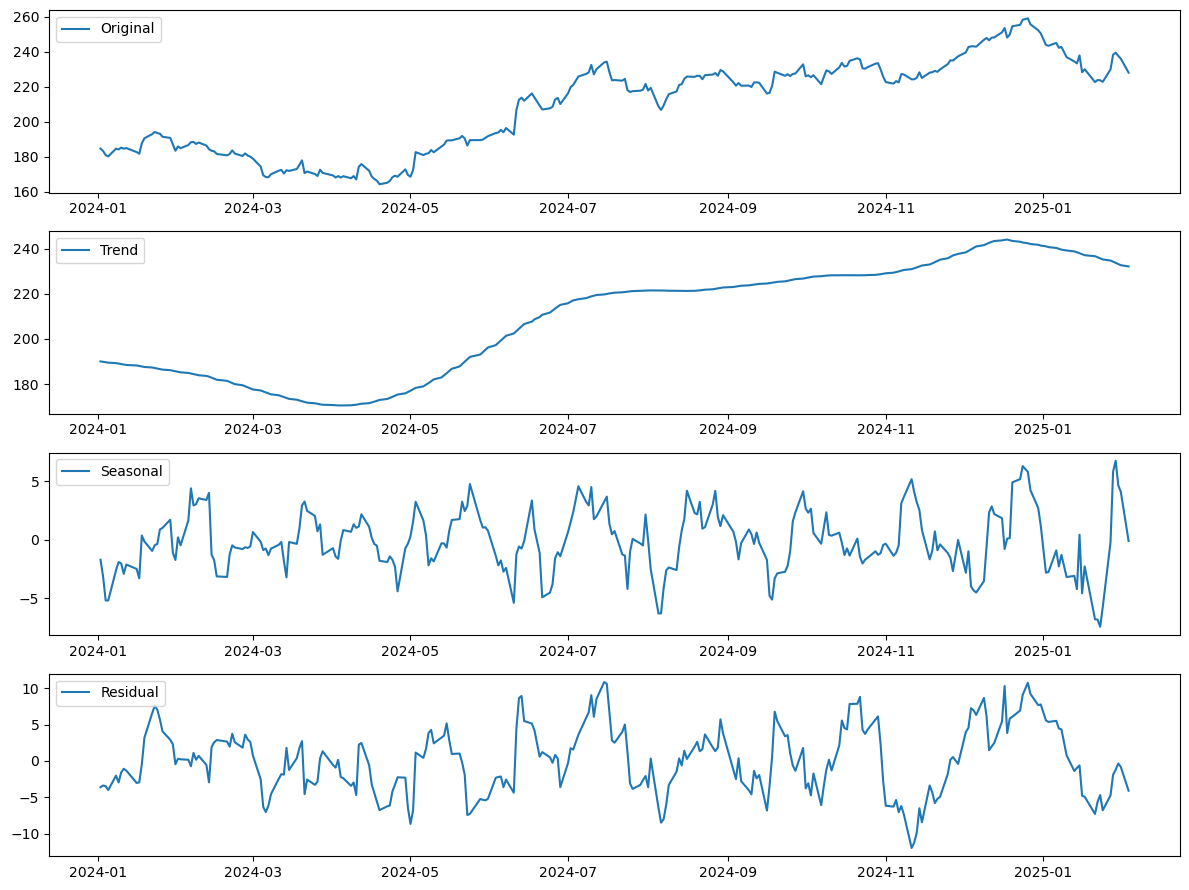

In [34]:
from statsmodels.tsa.seasonal import STL

stl = STL(stock_data['Close'], period = 30)
result = stl.fit()

# Plot the decomposition components
plt.figure(figsize=(12,9))

plt.subplot(411)
plt.plot(result.observed,label = 'Original')
plt.legend(loc = "upper left")

plt.subplot(412)
plt.plot(result.trend,label = 'Trend')
plt.legend(loc = "upper left")

plt.subplot(413)
plt.plot(result.seasonal,label = 'Seasonal')
plt.legend(loc = "upper left")

plt.subplot(414)
plt.plot(result.resid,label = 'Residual')
plt.legend(loc = "upper left")

plt.tight_layout()
plt.show()

### Stationarity Test

#### For Weak Stationarity

#### ADF Test

In [36]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey Fuller test
adf_test = adfuller(stock_data['Close'])
print('ADF Test results: ')
print(f'ADF_statistics: {round(adf_test[0], 3)}')
print(f'p_value: {round(adf_test[1], 3)}')
print('Critical values: ')

for key, value in adf_test[4].items():
    print(f'    {key}, {round(value, 3)}')

ADF Test results: 
ADF_statistics: -1.057
p_value: 0.732
Critical values: 
    1%, -3.455
    5%, -2.872
    10%, -2.572


#### KPSS Test

In [38]:
from statsmodels.tsa.stattools import kpss

# Perform the KPSS test
kpss_test = kpss(stock_data['Close'], regression = 'ct') # 'c' for constant(level stationarity), 'ct' for trend
print('KPSS Test results: ')
print(f'KPSS_statistics: {round(kpss_test[0], 3)}')
print(f'p_value: {round(kpss_test[1], 2)}')
print('Critical values: ')

for key, value in kpss_test[3].items():
    print(f'    {key}, {round(value, 3)}')

KPSS Test results: 
KPSS_statistics: 0.185
p_value: 0.02
Critical values: 
    10%, 0.119
    5%, 0.146
    2.5%, 0.176
    1%, 0.216


#### For Strict Stationarity

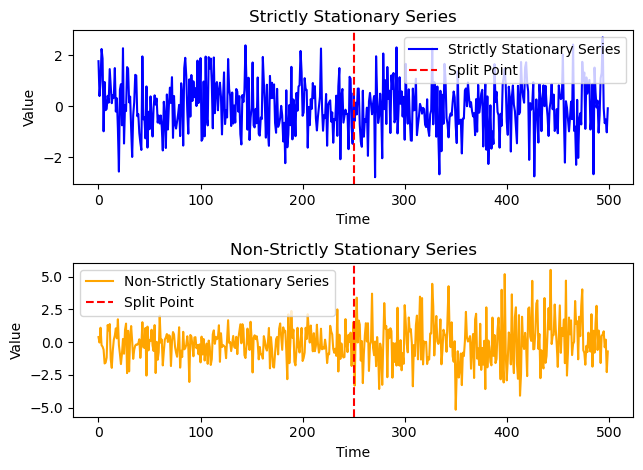

Strict Stationary Series - KS Test Statistic: 0.068, p_value: 0.6109
Weak Stationary Series - KS Test Statistic: 0.184, p_value: 0.0004


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

#genrating snthetic data for demonstration
np.random.seed(0)
n = 500

# strictly stationary series: normally distributed random noise
strict_stationary_series = np.random.normal(0, 1, n)

# non-strictly stationary series: changing variance
non_strict_stationary_series = np.concatenate([
        np.random.normal(0, 1, n // 2),
        np.random.normal(0, 2, n // 2)
    ])

# Function to split the series into 2 halves and perform the K-S test
def ks_test_stationarity(series):
    split = len(series)//2
    series_first_half = series[:split]
    series_second_half = series[split:]
    stat, p_value = ks_2samp(series_first_half, series_second_half)
    return stat, p_value

# perform the K-S test on strictly stationary series
ks_stat_strict, ks_pvalue_strict = ks_test_stationarity(strict_stationary_series)

# perform the K-S test on non-strictly stationary series
ks_stat_non_strict, ks_pvalue_non_strict = ks_test_stationarity(non_strict_stationary_series)

# Plotting the series
# Plot strictly stationary series
plt.subplot(2, 1, 1)
plt.plot(strict_stationary_series, label='Strictly Stationary Series', color='blue')
plt.axvline(len(strict_stationary_series)//2, color='red', linestyle='--', label='Split Point')
plt.title('Strictly Stationary Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Plot non-strictly stationary series
plt.subplot(2, 1, 2)
plt.plot(non_strict_stationary_series, label='Non-Strictly Stationary Series', color='orange')
plt.axvline(len(non_strict_stationary_series)//2, color='red', linestyle='--', label='Split Point')
plt.title('Non-Strictly Stationary Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

print(f'Strict Stationary Series - KS Test Statistic: {ks_stat_strict}, p_value: {round(ks_pvalue_strict, 4)}')
print(f'Weak Stationary Series - KS Test Statistic: {ks_stat_non_strict}, p_value: {round(ks_pvalue_non_strict, 4)}')

### Making Data Stationary

In [42]:
# Performing ADF and KPSS test to find the stationairty of the data

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: ', result[0])
    print('p_value: ', result[1])
    for key, value in result[4].items():
        print('Critical value (%s): %.3f' %  (key, value))

def kpss_test(series):
    result = kpsss(series, regression = 'c')
    print('KPSS Statistic: ', result[0])
    print('p_value: ', result[1])
    for key, value in result[3].items():
        print('Critical value (%s): %.3f' %  (key, value))
        

In [44]:
prices = stock_data['Close']
adf_test(prices)

ADF Statistic:  -1.0567325292546135
p_value:  0.7320146225780935
Critical value (1%): -3.455
Critical value (5%): -2.872
Critical value (10%): -2.572


##### 1st order differencing

In [100]:
pd_prices = pd.Series(prices)

In [50]:
prices_diff = prices.diff()

##### 2nd order differencing

In [54]:
prices.diff().diff()

Ticker,AAPL
Date,
2024-01-02,NaN
2024-01-03,NaN
2024-01-04,-0.945358
2024-01-05,1.602112
2024-01-08,5.085129
...,...
2025-01-28,1.319992
2025-01-29,-7.299988
2025-01-30,-2.870010


#### Transformation

In [56]:
import numpy as np
from scipy import stats

# Assuming prices is a NumPy array or a Pandas Series
prices = np.array(prices).flatten()  # Ensure prices is 1-dimensional

# Log transformation
prices_log = np.log(prices)

# square root transformation
prices_sqrt = np.sqrt(prices)

# Box-Cox transformation
# Note: Box-CoX requires all positive values
prices_boxcox, lam = stats.boxcox(prices[prices > 0])

In [58]:
import pandas as pd
pd.Series(prices_log)

0      5.218922
1      5.211406
2      5.198625
3      5.194604
4      5.218491
         ...   
268    5.473362
269    5.477969
270    5.470546
271    5.463832
272    5.429389
Length: 273, dtype: float64

In [60]:
pd.Series(prices_sqrt)

0      13.591725
1      13.540744
2      13.454485
3      13.427461
4      13.588796
         ...    
268    15.435673
269    15.471264
270    15.413955
271    15.362291
272    15.100000
Length: 273, dtype: float64

In [62]:
adf_test(prices_boxcox)

ADF Statistic:  -1.0862474710815226
p_value:  0.7205249794825092
Critical value (1%): -3.455
Critical value (5%): -2.872
Critical value (10%): -2.572


In [64]:
adf_test(prices_sqrt)

ADF Statistic:  -1.0370598567548388
p_value:  0.7395088090744819
Critical value (1%): -3.455
Critical value (5%): -2.872
Critical value (10%): -2.572


In [66]:
adf_test(prices_log)

ADF Statistic:  -1.020712262454123
p_value:  0.7456352230773076
Critical value (1%): -3.455
Critical value (5%): -2.872
Critical value (10%): -2.572


In [68]:
adf_test(prices_diff.dropna())

ADF Statistic:  -15.261749280341457
p_value:  4.850051016942381e-28
Critical value (1%): -3.455
Critical value (5%): -2.872
Critical value (10%): -2.572


In [70]:
1.595229851702415e-28 < 0.05

True

#### De-Trending

In [76]:
from scipy import signal

# Using a linear trend
trend = np.polyfit(np.arange(len(prices)), prices, 1)
trendline = np.polyval(trend, np.arange(len(prices)))
prices_detrended = prices - trendline

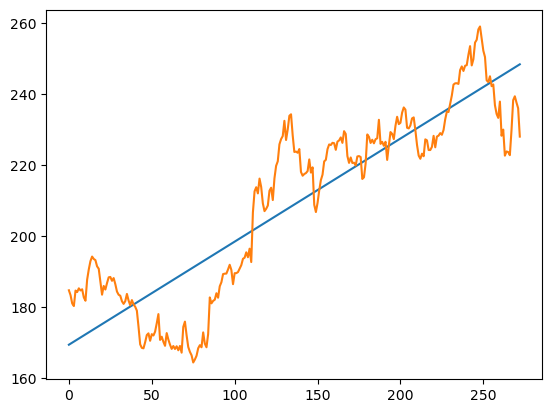

In [82]:
plt.plot(np.arange(len(prices)), trendline)
plt.plot(np.arange(len(prices)), prices)

#### Moving Average

In [102]:
# Using Moving Average to remove the trend
window = 12 # example window size
prices_ma = pd_prices.rolling(window = window).mean()
prices_detrended = pd_prices - prices_ma
prices_detrended = prices_detrended.dropna()

In [104]:
adf_test(prices_detrended)

ADF Statistic:  -4.579786230036491
p_value:  0.000140716338017942
Critical value (1%): -3.456
Critical value (5%): -2.873
Critical value (10%): -2.573


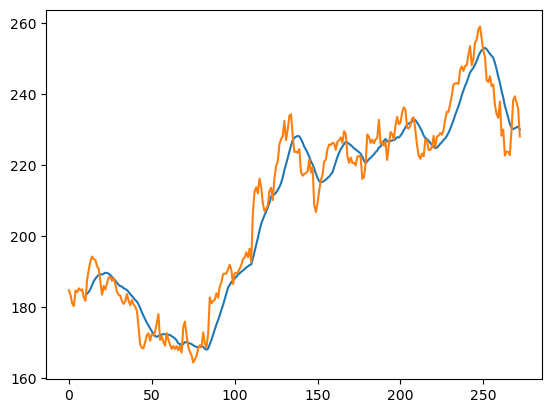

In [106]:
plt.plot(np.arange(len(pd_prices)), prices_ma)
plt.plot(np.arange(len(pd_prices)), pd_prices)

### Seasonal Adjustment

In [108]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition using Moving Averages
decomposition = seasonal_decompose(pd_prices, model = 'additive', period = 30)
prices_adjusted = pd_prices / decomposition.seasonal
prices_adjusted = prices_adjusted.dropna()

In [110]:
adf_test(prices_adjusted)

ADF Statistic:  -17.400905697857898
p_value:  4.9476647756559694e-30
Critical value (1%): -3.455
Critical value (5%): -2.872
Critical value (10%): -2.572


In [112]:
 8.298749718302976e-12 < 0.05

True

### Identify White noise & Random Walk

#### Ljung Box test

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox

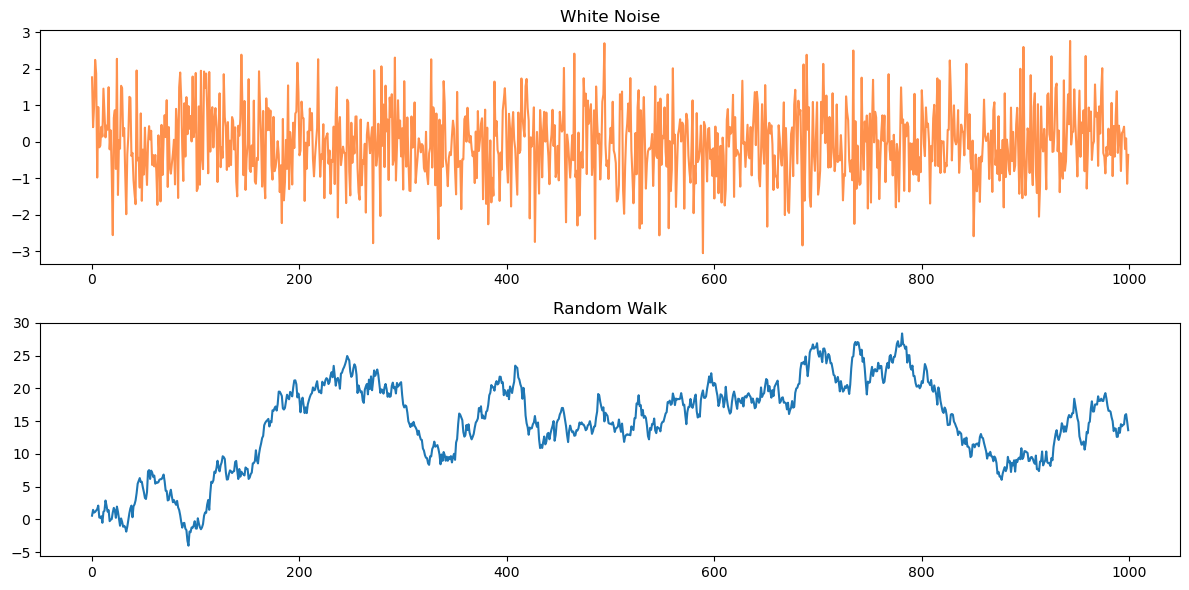


 Ljung-Box test for White-Noise: 
      lb_stat  lb_pvalue
10  14.025574   0.171828

 Ljung-Box test for Random Walk: 
        lb_stat  lb_pvalue
10  8828.660312        0.0


In [116]:
# Generating white noise and random walk for comparison
np.random.seed(0)
n = 1000

# White Noise
white_noise = np.random.normal(0,1,n)

# Random Walk
random_shocks = np.random.normal(0,1,n)
random_walk = np.cumsum(random_shocks)

# Plotting the series
plt.figure(figsize = (12,6))

plt.subplot(2,1,1)
plt.plot(white_noise, color = '#FF914D')
plt.title(f'White Noise')

plt.subplot(2,1,2)
plt.plot(random_walk)
plt.title(f'Random Walk')

plt.tight_layout()
plt.show()

# Ljung-Box test

print('\n Ljung-Box test for White-Noise: ')
lb_test_white_noise = acorr_ljungbox(white_noise, lags = [10], return_df = True)
print(lb_test_white_noise)

print('\n Ljung-Box test for Random Walk: ')
lb_test_random_walk = acorr_ljungbox(random_walk, lags = [10], return_df = True)
print(lb_test_random_walk)

### Time Series Forecasting Models

### AR Model

In [297]:
# making data stationary before model fitting

stock_data = yf.download('AAPL', start = '2023-01-01', end = '2024-01-01')
apple_price_stationary = stock_data['Close'].diff().dropna()

# Split the data into training and testing datasets
train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]

[*********************100%***********************]  1 of 1 completed


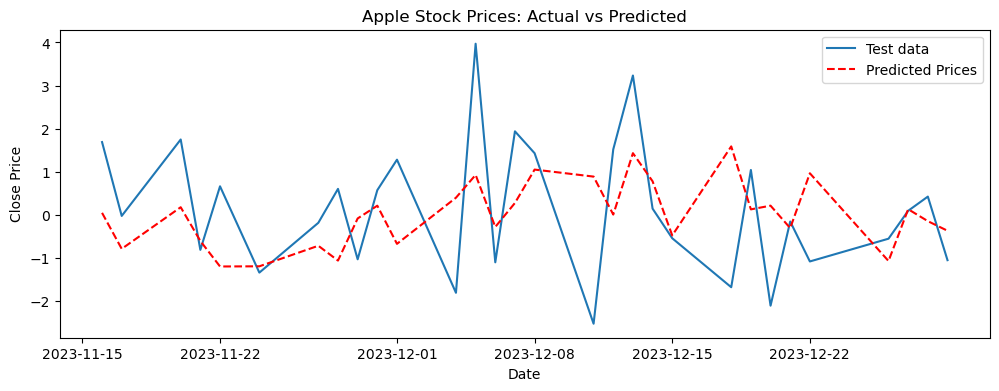

RMSE:  1.58


In [240]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Fit the AutoRegressive model (AR) to the training data
model = AutoReg(train_data, lags = 30)
model_fit = model.fit()

# Make prediction on the test data
predictions = model_fit.predict(
    start = len(train_data), 
    end = len(train_data) + len(test_data) - 1,
    dynamic = False
)

# Plot the actual vs predicted values
plt.figure(figsize = (12, 4))
plt.plot(test_data.index, test_data, label = 'Test data')
plt.plot(test_data.index, predictions, color = 'red', linestyle = '--', label = 'Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)),2)
print('RMSE: ', rmse)

### MA Model

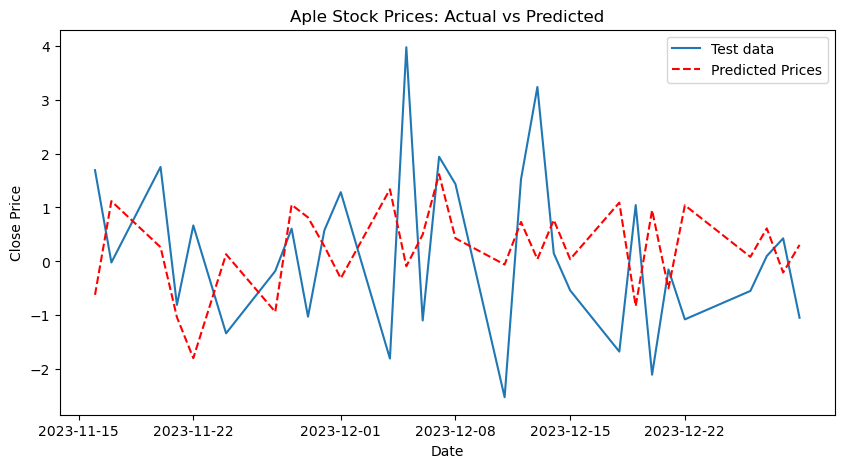

RMSE:  1.82


In [242]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the MA model to the training data
model = ARIMA(train_data, order=(0,0,30))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False)

# Plot the actual vs predicted values
plt.figure(figsize = (10,5))
plt.plot(test_data.index, test_data, label = 'Test data')
plt.plot(test_data.index, predictions, color = 'red', linestyle = '--', label = 'Predicted Prices')
plt.title('Aple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE: ', rmse)

### ARMA model 

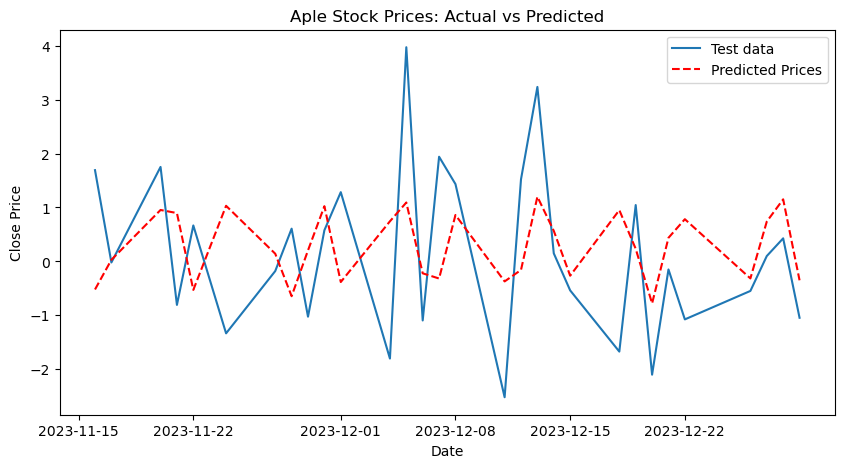

RMSE:  1.52


In [243]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARMA model to the training data
model = ARIMA(train_data, order=(7,0,7))    # 7 is selected based on the RMSE score
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False)

# Plot the actual vs predicted values
plt.figure(figsize = (10,5))
plt.plot(test_data.index, test_data, label = 'Test data')
plt.plot(test_data.index, predictions, color = 'red', linestyle = '--', label = 'Predicted Prices')
plt.title('Aple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE: ', rmse)

### ARIMA model

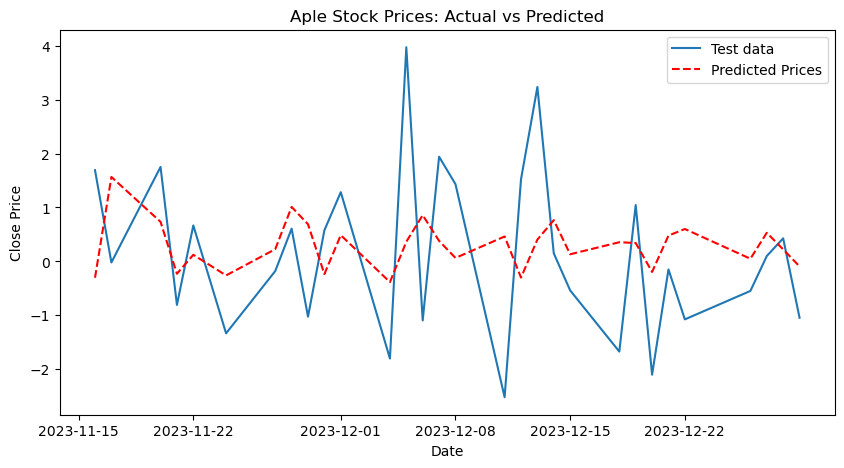

RMSE:  1.54


In [244]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model to the training data
model = ARIMA(train_data, order=(7,1,7))    # d (differencing) = 1 because the first order diff is stationary
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False)

# Plot the actual vs predicted values
plt.figure(figsize = (10,5))
plt.plot(test_data.index, test_data, label = 'Test data')
plt.plot(test_data.index, predictions, color = 'red', linestyle = '--', label = 'Predicted Prices')
plt.title('Aple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE: ', rmse)

### SARIMA model

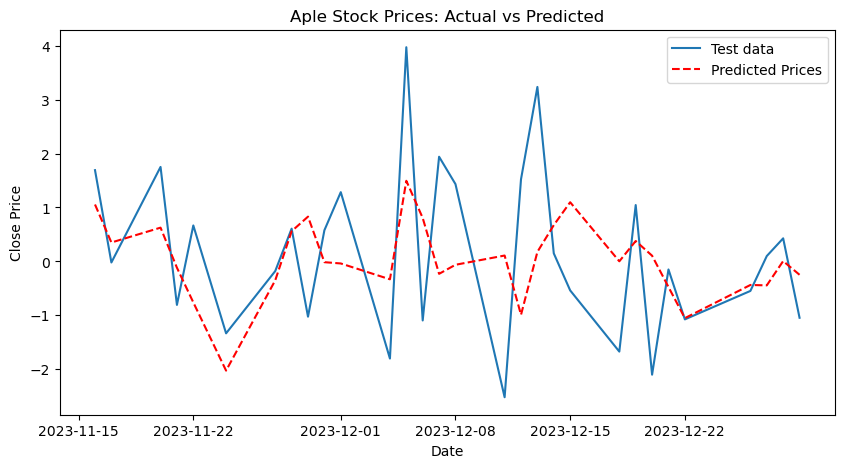

RMSE:  1.46


In [245]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, d, q = 7, 1, 7
P, D, Q, s = 1, 1, 1, 20  # s= 20 because in the seasonal decomposition graph, a season is being completed in almost 45 days

# Fit the SARIMA model to the training data
model = SARIMAX(train_data, order=(p, d, q), seasonal_order = (P, D, Q, s))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False)

# Plot the actual vs predicted values
plt.figure(figsize = (10,5))
plt.plot(test_data.index, test_data, label = 'Test data')
plt.plot(test_data.index, predictions, color = 'red', linestyle = '--', label = 'Predicted Prices')
plt.title('Aple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE: ', rmse)

## Vector models

In [246]:
tsla_data = yf.download('TSLA', start = '2023-01-01')

stock_data['TSLA_Close'] = tsla_data['Close']
stock_data['APPL_Close'] = stock_data['Close'].shift()    # appl_Close is shifted by 1 to predict today's TSLA close price using yesterday's APPL
stock_data.dropna(inplace = True)

from statsmodels.tsa.stattools import grangercausalitytests

# Perform grangerCausality test
grangercausalitytests(stock_data[['APPL_Close', 'TSLA_Close']].dropna(), maxlag = [14])
print()

[*********************100%***********************]  1 of 1 completed


Granger Causality
number of lags (no zero) 14
ssr based F test:         F=4.1852  , p=0.0000  , df_denom=206, df_num=14
ssr based chi2 test:   chi2=66.8415 , p=0.0000  , df=14
likelihood ratio test: chi2=58.8244 , p=0.0000  , df=14
parameter F test:         F=4.1852  , p=0.0000  , df_denom=206, df_num=14



In [154]:
stock_data

Price,Close,High,Low,Open,Volume,TSLA_Close,APPL_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2023-01-04,125.045036,127.321104,123.778358,125.569520,89113600,113.639999,123.768448
2023-01-05,123.718987,126.440369,123.461698,125.807030,80962700,110.339996,125.045036
2023-01-06,128.271103,128.934129,123.590330,124.698677,87754700,113.059998,123.718987
2023-01-09,128.795563,132.021647,128.538274,129.112240,70790800,119.769997,128.271103
2023-01-10,129.369537,129.894021,126.786698,128.904427,63896200,118.849998,128.795563
...,...,...,...,...,...,...,...
2023-12-22,192.656174,194.457347,192.029240,194.228458,37122800,252.539993,193.730896
2023-12-26,192.108856,192.944757,191.889928,192.666124,28919300,256.609985,192.656174


In [156]:
tsla_data

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2023-01-03,108.099998,118.800003,104.639999,118.470001,231402800
2023-01-04,113.639999,114.589996,107.519997,109.110001,180389000
2023-01-05,110.339996,111.750000,107.160004,110.510002,157986300
2023-01-06,113.059998,114.389999,101.809998,103.000000,220911100
2023-01-09,119.769997,123.519997,117.110001,118.959999,190284000
...,...,...,...,...,...
2025-01-28,398.089996,400.589996,386.500000,396.910004,48910700
2025-01-29,389.100006,398.589996,384.480011,395.209991,68033600


In [158]:
data = stock_data[['TSLA_Close', 'APPL_Close']].diff().dropna()
train_data, test_data = data[:-14], data[-14:]

### VAR model

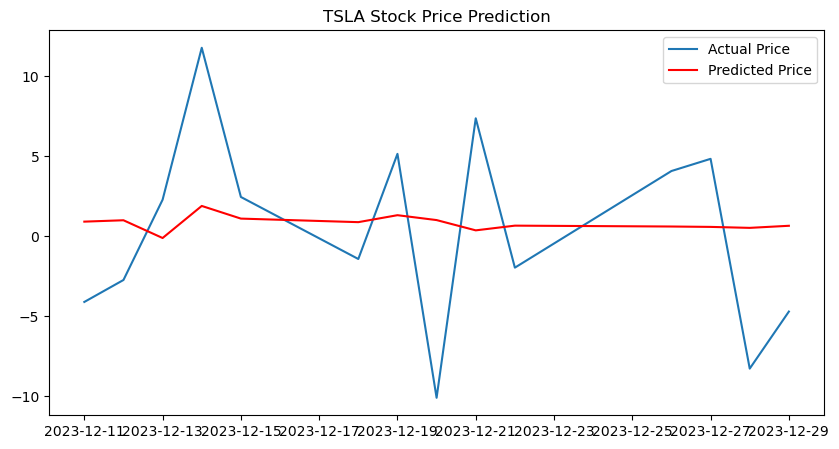

RMSE:  5.85


In [172]:
from statsmodels.tsa.api import VAR, VARMAX

# Fitting VAR model
model = VAR(train_data)
result = model.fit(maxlags=7)
predictions = result.forecast(train_data.values[-result.k_ar:], steps = len(test_data))

predictions = pd.DataFrame(predictions, index = test_data.index, columns = test_data.columns)
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data['TSLA_Close'], label = 'Actual Price')
plt.plot(test_data.index, predictions['TSLA_Close'], label = 'Predicted Price', color = 'red')
plt.legend()
plt.title('TSLA Stock Price Prediction')
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])), 2)
print('RMSE: ', rmse)


### VMA model

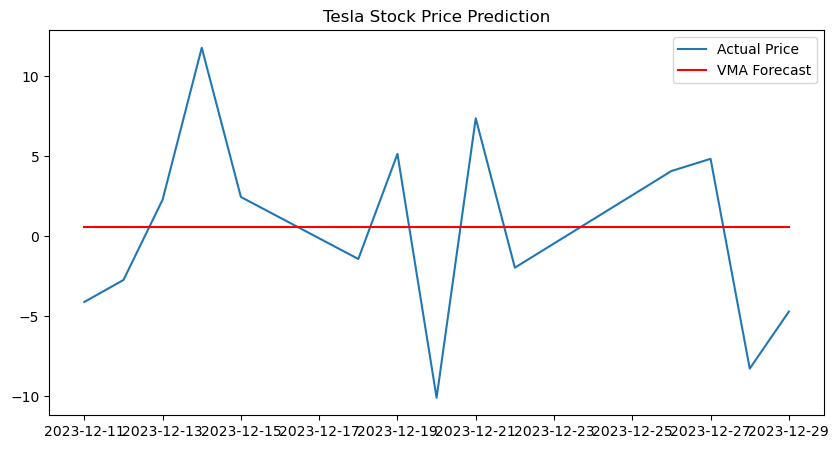

RMSE:  5.92


In [176]:
# Fitting VAR model
model = VARMAX(train_data, order = (0,14))
result = model.fit()
predictions = result.predict(
    start = len(train_data), 
    end = len(train_data) + len(test_data)-1,
    dynamic = False
)

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data['TSLA_Close'], label = 'Actual Price')
plt.plot(test_data.index, predictions['TSLA_Close'], label = 'VMA Forecast', color = 'red')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])), 2)
print('RMSE: ', rmse)


### VARIMA model

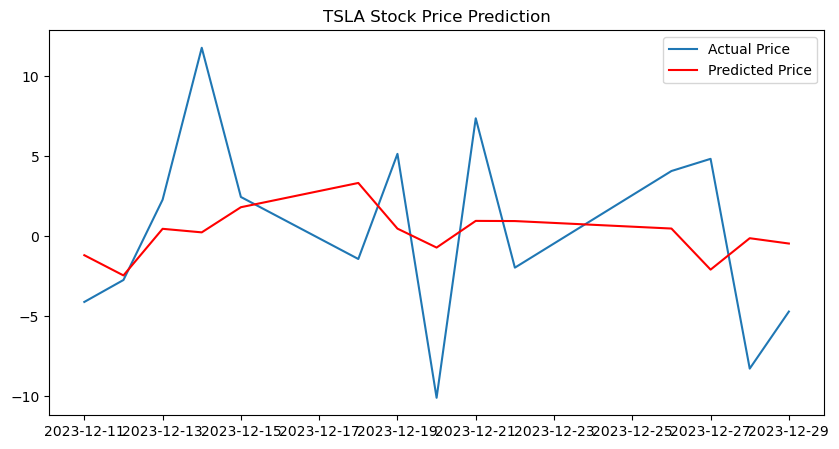

RMSE:  5.8


In [185]:
# Fitting VAR model
model = VARMAX(train_data, order =(16,16))
result = model.fit()
predictions = result.predict(
    start = len(train_data), 
    end = len(train_data) + len(test_data)-1,
    dynamic = False
)

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data['TSLA_Close'], label = 'Actual Price')
plt.plot(test_data.index, predictions['TSLA_Close'], label = 'Predicted Price', color = 'red')
plt.legend()
plt.title('TSLA Stock Price Prediction')
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])), 2)
print('RMSE: ', rmse)


## Smoothing Methods

### Moving Average

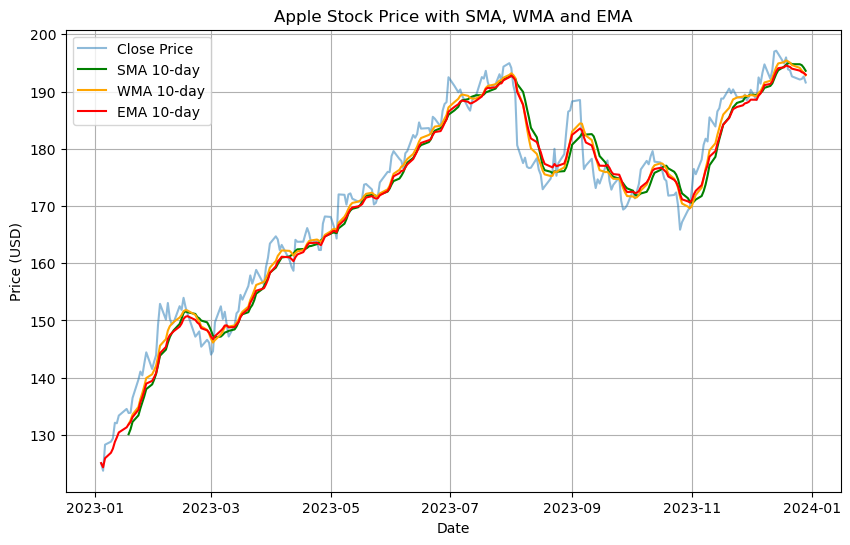

In [250]:
window_size = 10
stock_data['SMA'] = stock_data['Close'].rolling(window = window_size).mean()

# Calculate weighted moving average
weights = np.arange(1, window_size + 1)
stock_data['WMA'] = stock_data['Close'].rolling(window_size).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw = True)

# Caluclate Exponential Moving Average
stock_data['EMA'] = stock_data['Close'].ewm(span = window_size).mean()

# Plotting
plt.figure(figsize=(10,6))
plt.plot(stock_data['Close'], label = 'Close Price', alpha = 0.5)
plt.plot(stock_data['SMA'], label = f'SMA {window_size}-day', color = 'green')
plt.plot(stock_data['WMA'], label = f'WMA {window_size}-day', color = 'orange')
plt.plot(stock_data['EMA'], label = f'EMA {window_size}-day', color = 'red')

plt.title('Apple Stock Price with SMA, WMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

### Exponential Moving Average

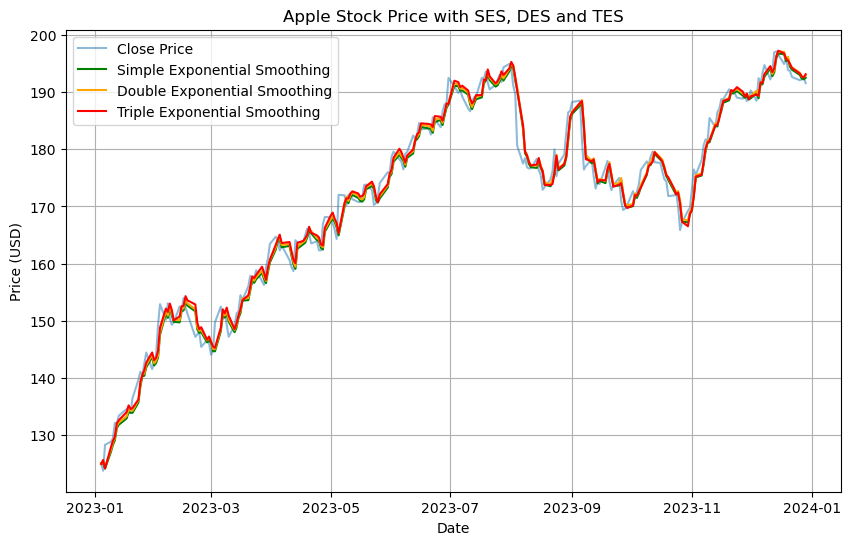

In [269]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Simple Exponenetial Smoothing
close_prices = stock_data['Close']
ses_model = SimpleExpSmoothing(close_prices).fit(smoothing_level = 0.7)
stock_data['SES'] = ses_model.fittedvalues

# Double Exponenetial Smoothing
des_model = ExponentialSmoothing(close_prices, trend = 'add').fit(smoothing_level = 0.7)
stock_data['DES'] = des_model.fittedvalues

# Triple Exponenetial Smoothing
tes_model = ExponentialSmoothing(close_prices, trend = 'add', seasonal = 'add', seasonal_periods = 12).fit(smoothing_level = 0.7)
stock_data['TES'] = tes_model.fittedvalues

# Plotting
plt.figure(figsize=(10,6))
plt.plot(stock_data['Close'], label = 'Close Price', alpha = 0.5)
plt.plot(stock_data['SES'], label = 'Simple Exponential Smoothing', color = 'green')
plt.plot(stock_data['DES'], label = 'Double Exponential Smoothing', color = 'orange')
plt.plot(stock_data['TES'], label = 'Triple Exponential Smoothing', color = 'red')

plt.title('Apple Stock Price with SES, DES and TES')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

### ACF and PACF Plots

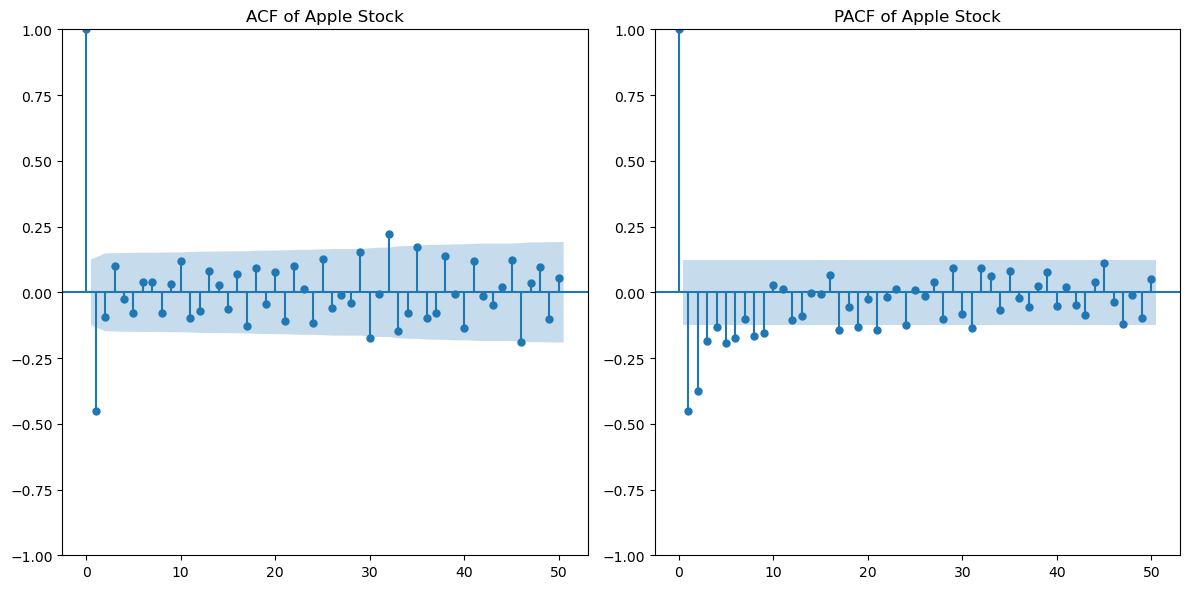

In [274]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,6))

# ACF Plot
plt.subplot(1,2,1)
plot_acf(stock_data['Close'].diff().diff().dropna(), ax = plt.gca(), lags = 50)
plt.title('ACF of Apple Stock')

# PACF Plot
plt.subplot(1,2,2)
plot_pacf(stock_data['Close'].diff().diff().dropna(), ax = plt.gca(), lags = 50, method = 'ywm')
plt.title('PACF of Apple Stock')

plt.tight_layout()
plt.show()

### Model Evaluation Metrics

In [277]:
train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]

# Fit the Autoregressive model to the training data
model = AutoReg(train_data, lags = 30)
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False
)

In [309]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Absolute Error (MAE): ', {mae})

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(test_data, predictions)
print(f'Mean Absolute Error (MSE): ', {mse})

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Absolute Error (RMSE): ', {rmse})

# 4. Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((list(test_data) - predictions) / list(test_data))) * 100
print(f'Mean Absolute Percentage Error (MAPE): ', {mape})

# AIC and BIC
aic = model_fit.aic
bic = model_fit.bic

print(f'Akaike Information Criteria (AIC): ', {aic})
print(f'Bayesian Information Criteria (BIC): ', {bic})

Mean Absolute Error (MAE):  {1.2548266518581153}
Mean Absolute Error (MSE):  {2.481546875291745}
Root Mean Absolute Error (RMSE):  {1.5752926316376095}


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U4'), dtype('float64')) -> None

In [311]:
# Fit the Autoregressive model to the training data
model = AutoReg(train_data, lags = 20)
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False
)

In [313]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Absolute Error (MAE): ', {mae})

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(test_data, predictions)
print(f'Mean Absolute Error (MSE): ', {mse})

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Absolute Error (RMSE): ', {rmse})

# 4. Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((list(test_data) - predictions) / list(test_data))) * 100
print(f'Mean Absolute Percentage Error (MAPE): ', {mape})

# AIC and BIC
aic = model_fit.aic
bic = model_fit.bic

print(f'Akaike Information Criteria (AIC): ', {aic})
print(f'Bayesian Information Criteria (BIC): ', {bic})

Mean Absolute Error (MAE):  {1.2709601510340827}
Mean Absolute Error (MSE):  {2.4027490590489538}
Root Mean Absolute Error (RMSE):  {1.5500803395466165}


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U4'), dtype('float64')) -> None

### Data Pre-Processing

#### Handling Missing values

In [323]:
sample_data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-04', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10','2024-01-12'],
    'Price': [100, 101, 103, 106, 107, 108, 109, 111]
}

# Create a dataframe
sample_data = pd.DataFrame(sample_data)
sample_data['Date'] = pd.to_datetime(sample_data['Date'])
sample_data.set_index('Date', inplace = True)

sample_data

ValueError: All arrays must be of the same length